<a href="https://colab.research.google.com/github/Kebatotkulov/UpGrad-E-_RecSys/blob/main/data_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Отчет команды №21


Ссылка на интерфейс: [Streamlit](https://share.streamlit.io/kebatotkulov/upgrad-e-_recsys/main/inter_streamlit.py)

Вопросы по проекту были представлены в трех категориях: замечания по проекту, вопросы по разработке, конкретные примеры. Некторые вопросы повторялись, поэтому мы оставили уникальные вопросы в каждой категории и охватили все вопросы.

## Замечания по проекту

Вопрос 1:
>В системе рекомендаций использован текстовый анализ. В примере в презентации написано: *мне нравится ..., но мне не хватает ...*. Вы действительно учитываете то, чего абитуриенту не хватает и чему бы он хотел научиться или система ищет только по ключевым словам (эконометрические модели, мат. подготовка) в описании программ магистратуры?


1) Как было упомянуто ранее, мы обучили модель Word2Vec по методу continuous bag of words (CBOW), суть которой заключается в предсказании центральных слов в окне документа. В данном случае в качестве окна выступает множество слов с длиной равной средней длине всех документов (описаний программ). Эмбеддинги документов представляют из себя средневзвешенные эмбеддингов слов этих документов по методу TF-IDF. 

2) Слова из категории "мне нравится", "мне не хватает" учитываются моделью, но эти слова не придают особого смысла для поиска рекомендаций, так как исходные описания программ по своему построению не содержат слова о недостатках -- каждое описание служит в качестве рекламного инструмента для образовательной программы.

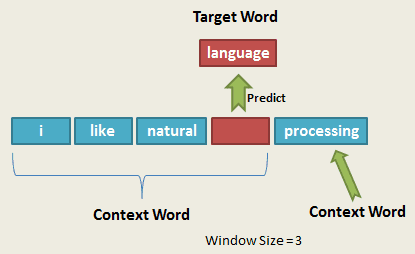

Вопрос 2:
>Возможно ли интегрировать этот проект в образовательные сайты?

Наша команда считает, что данная опция была бы отличным дополнением к стандартному подбору по параметрам для абитуриентов без конкретного представления о конкретных параметрах программ -- такова основная цель нашего проекта.

Вопрос 3:
>Были ли учтены предложения по доработке проекта от респондентов опроса?

Диана, можешь найти таблицу с ответами?

Вопрос 4:
> Как проверялось качество модели помимо опроса в гугл формах?

Экспертное мнение -- основной способ при отсутствии данных о выборе реальных пользователях. Были посчитаны средние метрики на основе субъективных оценок участников опроса, но эффективнее было работать с текстовыми описаниями проблем.
Но есть опорыне источники с проверкой качества основных моделей нашего проекта для классфикации текста: 

1) [Text Classification with Word2Vec](http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/)
 
2) [NLP performance of different word embeddings of text classification](https://towardsdatascience.com/nlp-performance-of-different-word-embeddings-on-text-classification-de648c6262b) 


Вопрос 5:
>Что используется для перевода промпта с русского?

Мы воспользовались [Google Translate API](https://pypi.org/project/googletrans/) из пакета googletrans в Python. Вы сможете найти различные примеры перейдя по ссылке.

Вопрос 6:
>Планируется ли расширение проекта не только в рамках ШЭМа?

Программы, на данный момент, не только для направлений ШЭМ -- там есть и дизайн, и естественные науки, и индустрия моды.

Вопрос 7:
>1. Немного непонятно было про то, почему выбирая разные параметры, на каких то высвечивалось уведомление "что программ меньше, обратите внимание на опцию ниже". почему так происходит?
>2. Выбирать можно несколько стран или только одну?

1) Вы в первую очередь выбираете N программ (можно  и с подбором параметров программ, и без него), а рекомендательная функция выдаёт Вам top-N самых схожих программ после подсчета расстояний между текстами и фильтрации по запрашиваемым параметрам. Опишу последовательность действий: а) Пользовательский ввод; б) Подсчет расстояний между текстом и описаниями в) Фльтрация по запрашиваемым параметрам (страна, стоимость, язык и т.д) г) Выведение N запршиваемых программ. 
Предупрежедение связано с недостаточным количество программ по заданным параметрам -- такое тоже случается, но после презентации мы немного исправили код с целью уменьшения таких случаев.

2) Можно выбрать даже все страны.



Вопрос 8:
>Но предусмотрено ли в вашем проекте обновление данных, будут ли показываться новые программы?

В своем идеале проект подразумевал прямое взаимодействие с сайтом Keystone, но мы отложили идею парсинга и обработки текстов в прямом эфире только по причине сильного замедления скорости работы раз в 10. Нам кажется, что с появлением новых знаний о парсинге и обработке текста, энтузиасты из нашей команды смогут доработать данный проект. 

Вопрос 9:
>Немного долго ищутся рекомендации.

Это связано с тем, что вводимый текст проходитт через процедуру очистки, токенизации и подсчета косинусных расстояний с каждой программой в базе. Мы решили работать без лемматизации предложений пользователей, так как результаты не сильно отличались от случая без нее (было проверено вручную на большом количестве примеров), но описания программ лемматизированы. 


Вопрос 10:
>Я как пользователь не очень понимаю кнопку "выключить фильтрацию" - что она значит? фильтрация чего? хотелось бы расшифровки
почему я выбираю страну "Россия" и в рекомендациях нет ничего из россии? я  понимаю тему с косинусным расстоянием, но как будто это нужно учитывать тоже, как минимум на нынешних реалиях :)

Опция позволяет пользователям обойтись без дополнительного подбора параметров. То есть после выбора данной опции, пользователь не должен вводить параметры учебных программ для получения желаемых рекомендаций. Отсутствие России в рекомендациях является интуитивно логичным, если Вы вводили это в текстовом поле так как система предназначена для выявления семантики, а не конкретных деталей в тексте. Ваша проблема должна решиться, если выбрать Россию с соответствующими существующим в базе программам параметрам. 


Например, можем увидеть результат запроса пяти программ по тексту, который по умолчанию с дополнительными параметрами (Российская Федерация, русский + английский, очное обучение + кампус без ограничений на стоимость и длительность)
Можете проверить в нашем интерфейсе на [Streamlit](https://share.streamlit.io/kebatotkulov/upgrad-e-_recsys/main/inter_streamlit.py)

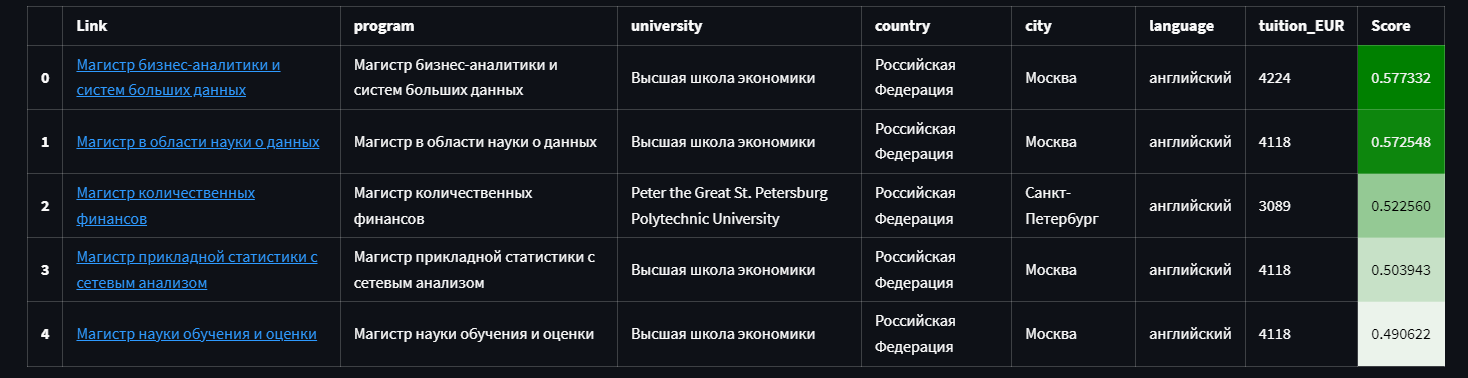


Вопрос 11:
>В некоторых программах стоимость очень низкая(например,45 евро), это связано с тем, что на исходном сайте это стоимость одного кредита, а не полного обучения, программа этого не учитывает

Спасибо за замечание, это действительно недостаток нашего датасета на данный момент. В перспективе данные моменты будут учитываться, проверяться дополнительно


Вопрос 12:
>1. Какой сценарий, если человек не знает, куда поступать и не имеет опыта? (Предположим, закончил бакалавр, но магистратуру хочет другую?) 
>2.По какому принципу формируется  данный список, который будет выведен пользователю? 

1) Во-первых, отключить фильтрацию и ввести свой текст -- в таком случае Вам не надо вводить параметры.

2) Принцип описан  ответе на первый вопрос.

Вопрос 13:
> Есть ли возможность смотреть российские вузы или только зарубеж?

Да, есть немало программ из России.


Вопрос 14:
> При выборе США в данных и статистике, как я понимаю, отражается всего лишь пять прграмм.

США в нашей базее скорее выброс, так как мы рассматривали Европейские университеты. Пять программ из США связаны с какими-то кампусами европейских университетов. MIT, Stanford, Ivy или еще что-то вы не сможете найти. Наша команда считает американские университеты темой отдельного комплексного проекта из-за абсолютно отличающейся специфики магистерских программ в США. 


## Вопросы по разработке

#### Вопрос 1:
- Процесс получения эмбеддингов и создания интерфейса.

- Как работает функция загрузки(справа вверху всплывает слово "running" и появляется анимация)? 

- Псмотреть код того, что происходит " под капотом" на сайте

Это достаточно комплексная часть из нескольких вопросов, поэтому разобьем ответ на несколько частей: 


1.   Общее описание процесса работы в Streamlit API
2.   
3.



#### Вопрос 2:
> Создание интерактивных карт POI. Построение интерактивной карты.


#### Вопрос 3:
>Как чистили данные?

#### Вопрос 4:
>Было бы интересно как они проводили исследование среди студентов и какие вопросы они задавали.

## Разбор примеров
